In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/50_Startups.csv',)

In [28]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [29]:
df.columns.to_list()


['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [30]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [31]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='Administration', ylabel='Profit'>

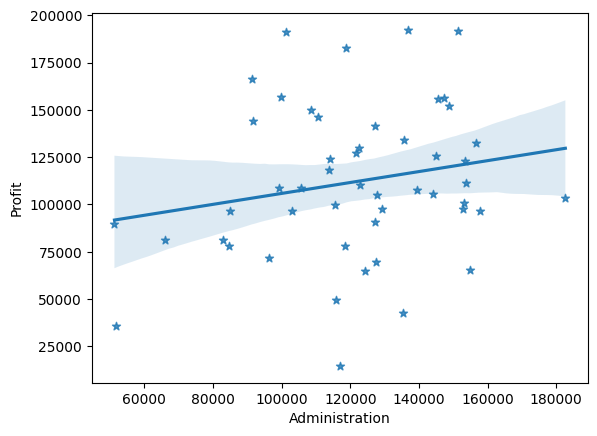

In [32]:
sns.regplot(x='Administration',y='Profit',data=df,marker='*')

<Axes: xlabel='R&D Spend', ylabel='Profit'>

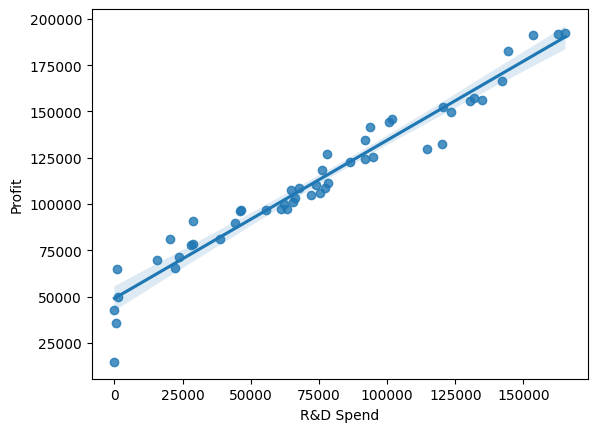

In [33]:
sns.regplot(x='R&D Spend',y='Profit',data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

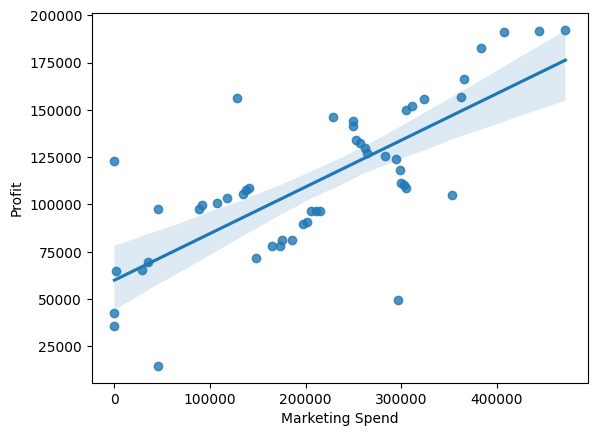

In [34]:
sns.regplot(x='Marketing Spend',y='Profit',data=df)


In [35]:
# cat_cols=['State']
# cat_trans=Pipeline(steps=[
#     ('oneHotEncoder',OneHotEncoder(drop='first'))
    
# ])

In [36]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("cat", cat_trans, cat_cols),
#     ]
# )

In [51]:
X=df.drop(columns=['Profit','Administration','State'],axis=1)
y=df['Profit']

In [52]:
Xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [40]:
# clf=Pipeline(steps=[
#     ('pre',preprocessor),
#     ('linear',LinearRegression())
# ])
# clf.fit(Xtrain,ytrain)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('oneHotEncoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['State'])])),
                ('linear', LinearRegression())])

In [53]:
model=Pipeline(steps=[
    ( 'LinearRegression',LinearRegression())
])
model.fit(Xtrain,ytrain)

Pipeline(steps=[('LinearRegression', LinearRegression())])

In [65]:
ypred=model.predict(xtest)
print(f'r2score {r2_score(ytest,ypred)}')
print(f'mae { mean_absolute_error(ytest,ypred)}')
print(f'mse {mean_squared_error(ytest,ypred)}')

r2score 0.925054012728492
mae 6720.455382519556
mse 68146348.02941906


In [57]:
model.feature_names_in_

array(['R&D Spend', 'Marketing Spend'], dtype=object)

In [60]:
model.predict([[123334.88,304981.62]])

/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([155111.52836312])